In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error



In [2]:
baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")
del baseDeDonnees["sunset_hhmm"]
del baseDeDonnees["sunrise_hhmm"]
baseDeDonnees


C:\Users\test8\AppData\Local\Temp\ipykernel_13476\2278083711.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-04-06,8.1,5.31,3.90,-0.3,NaN,NaN,97,66.0,65.5,34,...,NaN,NaN,8.0,7.6,7.5,7.0,NaN,NaN,NaN,NaN
2025-04-05,7.4,4.45,4.50,1.6,NaN,NaN,96,73.6,74.5,53,...,NaN,NaN,8.0,7.5,6.5,5.0,NaN,NaN,NaN,NaN
2025-04-04,10.6,6.77,6.90,3.2,NaN,NaN,69,53.2,54.0,39,...,NaN,NaN,7.0,2.9,4.0,1.0,NaN,NaN,NaN,NaN
2025-04-03,18.8,8.31,9.60,0.4,NaN,NaN,93,77.2,69.5,46,...,NaN,NaN,8.0,6.2,4.0,0.0,NaN,NaN,NaN,NaN
2025-04-02,1.4,-2.20,-2.80,-7.0,NaN,-12.0,93,48.5,62.0,31,...,NaN,NaN,8.0,4.5,4.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-05,-10.6,-14.87,-17.50,-24.4,NaN,-24.0,87,79.5,74.0,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,-15.6,-21.03,-21.70,-27.8,NaN,-28.0,79,68.1,68.5,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,-10.0,-18.01,-16.95,-23.9,NaN,-28.0,76,61.0,59.5,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Verifier quel donné sont trop peu.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc


max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747783
                               ...   
min_cloud_cover_8            0.792024
max_cloud_cover_10           0.994154
avg_hourly_cloud_cover_10    0.994154
avg_cloud_cover_10           0.994154
min_cloud_cover_10           0.994154
Length: 69, dtype: float64

In [4]:
colonne_valide = baseDeDonnees.columns[null_prc < 0.05]
colonne_valide.shape[0]

36

In [5]:
baseDeDonnees = baseDeDonnees[colonne_valide].copy()
baseDeDonnees.dtypes

max_temperature                 float64
avg_hourly_temperature          float64
avg_temperature                 float64
min_temperature                 float64
max_relative_humidity             int64
avg_hourly_relative_humidity    float64
avg_relative_humidity           float64
min_relative_humidity             int64
max_dew_point                   float64
avg_hourly_dew_point            float64
avg_dew_point                   float64
min_dew_point                   float64
max_wind_speed                    int64
avg_hourly_wind_speed           float64
avg_wind_speed                  float64
min_wind_speed                    int64
max_pressure_sea                float64
avg_hourly_pressure_sea         float64
avg_pressure_sea                float64
min_pressure_sea                float64
max_pressure_station            float64
avg_hourly_pressure_station     float64
avg_pressure_station            float64
min_pressure_station            float64
max_visibility                    int64


In [6]:
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()
#Remplir les trous dans la base de donné par avec la valeurs avant.
baseDeDonnees = baseDeDonnees.ffill()
#Verification qu'il ne manque plus de manque de donnés.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc



max_temperature                 0.0
avg_hourly_temperature          0.0
avg_temperature                 0.0
min_temperature                 0.0
max_relative_humidity           0.0
avg_hourly_relative_humidity    0.0
avg_relative_humidity           0.0
min_relative_humidity           0.0
max_dew_point                   0.0
avg_hourly_dew_point            0.0
avg_dew_point                   0.0
min_dew_point                   0.0
max_wind_speed                  0.0
avg_hourly_wind_speed           0.0
avg_wind_speed                  0.0
min_wind_speed                  0.0
max_pressure_sea                0.0
avg_hourly_pressure_sea         0.0
avg_pressure_sea                0.0
min_pressure_sea                0.0
max_pressure_station            0.0
avg_hourly_pressure_station     0.0
avg_pressure_station            0.0
min_pressure_station            0.0
max_visibility                  0.0
avg_hourly_visibility           0.0
avg_visibility                  0.0
min_visibility              

In [7]:
#Rendre en minuscule les titres
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()

<Axes: xlabel='date'>

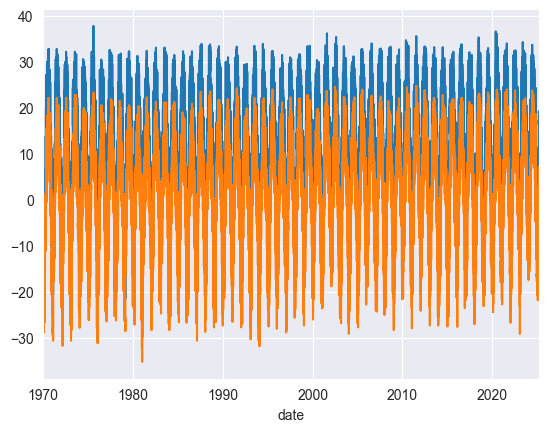

In [8]:
baseDeDonnees.index = pd.to_datetime(baseDeDonnees.index)
baseDeDonnees.index.year.value_counts().sort_index()
baseDeDonnees["max_temperature"].plot()
baseDeDonnees["min_temperature"].plot()


In [9]:
#Inverser les dates.
baseDeDonnees = baseDeDonnees.iloc[::-1]
#Choix de se qu'on veut produire.(Ici temperature maximum)
baseDeDonnees["target"] = baseDeDonnees.shift(-1)["max_temperature"]

baseDeDonnees = baseDeDonnees.ffill()


In [10]:
#Configuration du model
model_rr = Ridge(alpha=0.1)
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
predicteur


Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow'],
      dtype='object')

In [11]:
def backtest(baseDeDonnees,model,predicteur,start =3650 ,step=90):
    all_predictions = []
    for i in range(start,baseDeDonnees.shape[0],step):
        train = baseDeDonnees.iloc[:i,:]
        test = baseDeDonnees.iloc[i:i+step,:]

        model.fit(train[predicteur],train["target"])
        preds = model.predict(test[predicteur])
        preds = pd.Series(preds,index =test.index)
        combined = pd.concat([test["target"],preds],axis=1)
        combined.columns = ["Vrais valeur","Valeur predite"]
        combined["difference"] = (combined["Valeur predite"] - combined["Vrais valeur"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [12]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)

In [13]:
#Creer la valeur d'erreur pour la voir diminuer.(En Gros en calcul la moyenne de la difference.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.8700816291171845

In [14]:
def prc_diff(ancienne,nouvelle):
    return (nouvelle - ancienne) /ancienne
def computer_rolling(baseDeDonnees,horizon,col):
    label = f"rolling_{horizon}_{col}"

    baseDeDonnees[label] = baseDeDonnees[col].rolling(horizon).mean()
    baseDeDonnees[f"{label}_pct"] = prc_diff(baseDeDonnees[label],baseDeDonnees[col])
    return baseDeDonnees
rolling_horizon = [3, 14]

for horizon in  rolling_horizon:
    for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
        baseDeDonnees = computer_rolling(baseDeDonnees,horizon,col)

#Enlever les valeurs NaN generer parce que les il n'y as de donnes les 14 derniers jours.
baseDeDonnees = baseDeDonnees.iloc[14:,:]
baseDeDonnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,rolling_14_max_temperature,rolling_14_max_temperature_pct,rolling_14_min_temperature,rolling_14_min_temperature_pct,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snow,rolling_14_snow_pct
date,,,,,,,,,,,,,,,,,,,,,
1970-01-15,-20.0,-22.09,-22.50,-25.0,58,51.9,53.0,48,-27.8,-29.3,...,-12.557143,0.592719,-21.892857,0.141925,0.442857,-1.000000,0.000000,NaN,0.635714,-1.000000
1970-01-16,-11.1,-16.38,-17.50,-23.9,79,63.3,65.5,52,-16.7,-21.8,...,-12.514286,-0.113014,-22.328571,0.070377,0.642857,3.355556,0.000000,NaN,0.892857,3.032000
1970-01-17,-4.4,-8.22,-8.85,-13.3,91,75.4,70.5,50,-8.9,-11.7,...,-12.114286,-0.636792,-21.571429,-0.383444,0.642857,-1.000000,0.000000,NaN,0.892857,-1.000000
1970-01-18,-11.7,-15.95,-17.25,-22.8,62,55.0,55.0,48,-19.4,-23.0,...,-11.835714,-0.011467,-21.214286,0.074747,0.664286,-0.548387,0.000000,NaN,0.914286,-0.671875
1970-01-19,-18.3,-22.50,-23.60,-28.9,72,60.0,62.0,52,-24.4,-28.2,...,-12.385714,0.477509,-21.535714,0.341957,0.557143,-1.000000,0.000000,NaN,0.750000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.4,-2.20,-2.80,-7.0,93,48.5,62.0,31,-1.3,-12.3,...,5.707143,-0.754693,-3.064286,1.284382,3.114286,-0.486239,2.428571,-0.917647,0.685714,1.041667
2025-04-03,18.8,8.31,9.60,0.4,93,77.2,69.5,46,11.9,4.1,...,5.671429,2.314861,-3.464286,-1.115464,4.671429,3.795107,3.985714,4.620072,0.685714,-1.000000
2025-04-04,10.6,6.77,6.90,3.2,69,53.2,54.0,39,-0.3,-2.3,...,5.942857,0.783654,-3.121429,-2.025172,4.671429,-1.000000,3.985714,-1.000000,0.685714,-1.000000


In [15]:
def expend_mean(baseDeDonnees):
    return baseDeDonnees.expanding(1).mean()
for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
    baseDeDonnees[f"month_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.month,group_keys = False).apply(expend_mean)
    baseDeDonnees[f"day_year_avg_{col}"] = baseDeDonnees[col].groupby(baseDeDonnees.index.day_of_year,group_keys = False).apply(expend_mean)

In [16]:
#Creation a nouveau de notre predicteur avec les nouvelles colonnes creer au dessus.
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonnees.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonnees = baseDeDonnees.fillna(0)


In [17]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.85054e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.85051e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.8378e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.84994e-35): result may not be accurate.
  return linalg.solve(

In [18]:
#Voir le taux d'erreur pour comparer avec le taux d'erreur d'avant que nous avons calculer au dessus.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.7306733425831173

In [19]:
#Permet de voir les jours qui on une enorme difference dans nos predictions pour savoir futurement pourquoi et essayer de regler cela.
predictions.sort_values("difference", ascending=False)

,Vrais valeur,Valeur predite,difference
date,,,
1990-11-27,19.2,1.458673,17.741327
1994-01-27,8.1,-7.674331,15.774331
1998-01-01,5.3,-9.792568,15.092568
1997-02-17,8.2,-6.836322,15.036322
2014-04-13,24.5,9.951703,14.548297
...,...,...,...
2012-09-13,27.4,27.397961,0.002039
2014-07-20,29.4,29.401930,0.001930
2011-12-01,4.0,4.001792,0.001792


In [20]:

last_known_values = baseDeDonnees.iloc[-1][predicteur].values.reshape(1, -1)
predicted_value = model_rr.predict(last_known_values)[0]

# Créer un dictionnaire pour la nouvelle ligne de données
new_day = {
    "target": predicted_value,  # Remplir la cible avec la prédiction
}

# Pour les autres colonnes, ajouter NaN
for col in baseDeDonnees.columns:
    if col != "target":
        new_day[col] = np.nan

# Créer un DataFrame avec la nouvelle journée, en prenant comme date la suivante dans l'index
new_index = baseDeDonnees.index[-1] + pd.Timedelta(days=1)
new_day_df = pd.DataFrame(new_day, index=[new_index])

# Ajouter cette nouvelle ligne à la base de données
baseDeDonnees = pd.concat([baseDeDonnees, new_day_df])

# Vérifier le résultat
baseDeDonnees.tail()



C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,month_avg_max_temperature,day_year_avg_max_temperature,month_avg_min_temperature,day_year_avg_min_temperature,month_avg_precipitation,day_year_avg_precipitation,month_avg_rain,day_year_avg_rain,month_avg_snow,day_year_avg_snow
2025-04-03,18.8,8.31,9.6,0.4,93.0,77.2,69.5,46.0,11.9,4.1,...,11.118875,7.794643,1.002238,-0.678571,2.965578,3.321429,2.467937,2.517857,0.421113,0.741071
2025-04-04,10.6,6.77,6.9,3.2,69.0,53.2,54.0,39.0,-0.3,-2.3,...,11.118561,7.294643,1.003567,-1.328571,2.963785,5.369643,2.466445,4.508929,0.420859,0.835714
2025-04-05,7.4,4.45,4.5,1.6,96.0,73.6,74.5,53.0,4.8,-0.1,...,11.116314,6.733929,1.003927,-1.489286,2.969124,4.083929,2.472085,1.860714,0.420604,1.292857
2025-04-06,8.1,5.31,3.9,-0.3,97.0,66.0,65.5,34.0,5.1,-1.4,...,11.114493,6.682143,1.003140,-1.441071,2.968901,2.667857,2.472162,2.269643,0.420350,0.398214
2025-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
